In [1]:
# Code 12: Preform regression on patient satisfaction and readmission
# In this assignment, you will work with hospital patient data, which includes information on patient health outcomes and their satisfaction with their hospital experience on a Likert scale. 
# Your task is to perform data analysis and use logistic regression to determine if there is any possible correlation between overall satisfaction scores and readmission rates.

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr



In [15]:
# Write a Python program to read the patient data from the Week14Assignment.txt file and perform data analysis.
# Reads in txt file
Patient_data_txt = np.loadtxt(r"\Users\isaia\OneDrive\Desktop\Week 14\Week14Assignment (1).txt", dtype= 'str', delimiter=',')

# Sets up seperate arrays for each variable
PatientID = Patient_data_txt[:,0]
Readmission = Patient_data_txt[:,1]
Staff_Satisfaction = Patient_data_txt[:,2]
Cleanliness_Satisfaction = Patient_data_txt[:,3]
Food_Satisfaction = Patient_data_txt[:,4]
Comfort_Satisfaction = Patient_data_txt[:,5]
Communication_Satisfaction = Patient_data_txt[:,6]

# converts seperate arrays into a data frame
Patient_data_DF = { 'PatientID': PatientID, 
        'Readmission': Readmission,
        'Staff_Satisfaction': Staff_Satisfaction,
        'Cleanliness_Satisfaction': Cleanliness_Satisfaction,
        'Food_Satisfaction': Food_Satisfaction,
        'Comfort_Satisfaction': Comfort_Satisfaction,
        'Communication_Satisfaction': Communication_Satisfaction }

Patient_data_DF = pd.DataFrame(Patient_data_DF) # Creates dataframe 
Patient_data_DF = Patient_data_DF.drop(0) # removes redundant row with column names

Patient_data_DF

# Changing columns 1 thorugh 31 from str to floats
Patient_data_DF.astype(float)


,PatientID,Readmission,Staff_Satisfaction,Cleanliness_Satisfaction,Food_Satisfaction,Comfort_Satisfaction,Communication_Satisfaction
1,101.0,1.0,4.0,5.0,3.0,4.0,5.0
2,102.0,0.0,3.0,2.0,4.0,2.0,3.0
3,103.0,1.0,5.0,4.0,5.0,4.0,4.0
4,104.0,0.0,5.0,3.0,5.0,4.0,5.0
5,105.0,1.0,4.0,5.0,3.0,4.0,4.0
6,106.0,1.0,2.0,3.0,2.0,3.0,3.0
7,107.0,0.0,3.0,2.0,3.0,4.0,3.0
8,108.0,0.0,5.0,5.0,4.0,5.0,5.0
9,109.0,1.0,4.0,4.0,4.0,4.0,4.0
10,110.0,0.0,3.0,3.0,3.0,4.0,3.0


In [17]:
## Calculate and display the following statistics: 
# The number of patients who were readmitted.

Patient_Readmission_count = Patient_data_DF['Readmission'].value_counts().get(1, 0)

print("Number of patients readmitted:", Patient_Readmission_count)

# The average satisfaction score for each category (staff, cleanliness, food, comfort, and communication).

# Staff_Satisfaction
Staff_Satisfaction = Patient_data_DF['Staff_Satisfaction'].astype(float)
Staff_Satisfaction_mean = np.mean(Staff_Satisfaction)
print("Average staff satisfaction", Staff_Satisfaction_mean)

#Cleanliness_Satisfaction 
Cleanliness_Satisfaction = Patient_data_DF['Cleanliness_Satisfaction'].astype(float)
Cleanliness_Satisfaction_mean = np.mean(Cleanliness_Satisfaction)
print("Average cleanliness satisfaction", round(Cleanliness_Satisfaction_mean, 2))


#Food_Satisfaction 
Food_Satisfaction = Patient_data_DF['Food_Satisfaction'].astype(float)
Food_Satisfaction_mean = np.mean(Food_Satisfaction,)
print("Average food satisfaction", round(Food_Satisfaction_mean, 2))

#Comfort_Satisfaction 
Comfort_Satisfaction = Patient_data_DF['Comfort_Satisfaction'].astype(float)
Comfort_Satisfaction_mean = np.mean(Comfort_Satisfaction)
print("Average comfort satisfaction", round(Comfort_Satisfaction_mean, 2))

#Communication_Satisfaction 
Communication_Satisfaction = Patient_data_DF['Communication_Satisfaction'].astype(float)
Communication_Satisfaction_mean = np.mean(Communication_Satisfaction)
print("Average communication satisfaction", round(Communication_Satisfaction_mean,2))

print()

Number of patients readmitted: 15
Average staff satisfaction 3.5
Average cleanliness satisfaction 3.6
Average food satisfaction 3.53
Average comfort satisfaction 3.73
Average communication satisfaction 3.7



C:\Users\isaia\AppData\Local\Temp\ipykernel_19612\3730575333.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Patient_Readmission_count = Patient_data_DF['Readmission'].value_counts().get(1, 0)


Logistic Regression Output
Accuracy of modal:  0.78
Intercept: [-0.04424315]
Coefficients: [[-0.07275275  1.59027622 -0.01807533 -0.62108287 -0.46295251]]


<Axes: xlabel='Overall_Satisfaction', ylabel='Readmission'>

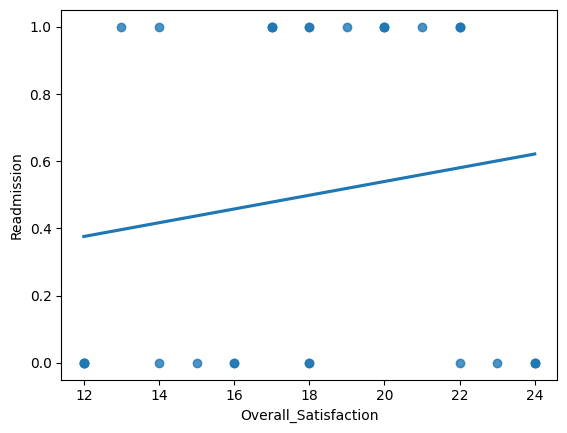

In [18]:
# Implement logistic regression to determine if there is any possible correlation between overall satisfaction scores and readmission rates. 
# Display the logistic regression results to indicate whether there is a statistically significant correlation between overall satisfaction scores and readmission rates.
# Plot the data points along with the logistic regression curve to visualize the correlation.

# Defining Predictor varibles (X) and Response variable (Y)
X = Patient_data_DF[['Staff_Satisfaction', 'Cleanliness_Satisfaction', 'Food_Satisfaction', 'Comfort_Satisfaction', 'Communication_Satisfaction']]
Y = Patient_data_DF[['Readmission']].values.ravel()

# Normalizing the data to fit into logistic model and stay between 0 & 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Assigning Training and test samples 
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 42)

# Creating LR Model
log_regression = LogisticRegression()

# Training the LR modal using training data
log_regression.fit(X_train, Y_train)

# Predicting the target varible on test data
Y_pred = log_regression.predict(X_test)

# LR Modal accuracy eval. 

print('Logistic Regression Output')
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of modal: {accuracy: .2f}")

# LR coefficients
print('Intercept:', log_regression.intercept_)
print('Coefficients:', log_regression.coef_)

# Correlation between Overall satisfaction scores and Readmission 
Patient_data_DF['Staff_Satisfaction'] = pd.to_numeric(Patient_data_DF['Staff_Satisfaction'])
Patient_data_DF['Cleanliness_Satisfaction'] = pd.to_numeric(Patient_data_DF['Cleanliness_Satisfaction'])
Patient_data_DF['Food_Satisfaction'] = pd.to_numeric(Patient_data_DF['Food_Satisfaction'])
Patient_data_DF['Comfort_Satisfaction'] = pd.to_numeric(Patient_data_DF['Comfort_Satisfaction'])
Patient_data_DF['Communication_Satisfaction'] = pd.to_numeric(Patient_data_DF['Communication_Satisfaction'])

# Adds the following and than divids by 5 to produce a new column titled Overall_Satisfaction
Patient_data_DF['Overall_Satisfaction'] = (
    Patient_data_DF['Staff_Satisfaction'] +
    Patient_data_DF['Cleanliness_Satisfaction'] +
    Patient_data_DF['Food_Satisfaction'] +
    Patient_data_DF['Comfort_Satisfaction'] +
    Patient_data_DF['Communication_Satisfaction'])



# Converting columns to numeric 
Patient_data_DF['Readmission'] = pd.to_numeric(Patient_data_DF['Readmission'])
Patient_data_DF['Overall_Satisfaction'] = pd.to_numeric(Patient_data_DF['Overall_Satisfaction'])

Readmission_ = Patient_data_DF['Readmission']
Overall_Satisfaction_ = Patient_data_DF["Overall_Satisfaction"]

# logistic regression plot
sns.regplot(x=Patient_data_DF['Overall_Satisfaction'], y=Patient_data_DF["Readmission"], ci=False )


In [23]:
# Correlation between Overall satisfaction scores and Readmission 
corr,_ = pearsonr(Readmission_, Overall_Satisfaction_)  
print('Pearson correlation between Overall Satisfaction Scores & Readmission: %.3f' % corr) 






Pearson correlation between Overall Satisfaction Scores & Readmission: 0.157
